In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_excel('D:/flight_price.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#  1. Checking the dimensions

In [33]:
df.shape[0], df.shape[1]

(10683, 13)

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df['date']=df['Date_of_Journey'].str.split('/').str[0]  #transferring the data into 3 columns
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]

In [8]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  date             10683 non-null  object
 11  month            10683 non-null  object
 12  year             10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [11]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_mins']=df['Dep_Time'].str.split(':').str[1]

In [12]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30


In [13]:
df.drop('Dep_Time',axis=1,inplace=True)

In [14]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,04,2019,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30


In [15]:
df['Arrival_hour'] =df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_mins'] =df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]


In [16]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [17]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,04,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,04,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,04,2019,08,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,01,03,2019,11,30,14,10


In [18]:
def convert_into_minutes(Duration):
    total_minutes=0
    for i in Duration.split():
        if 'h' in i:
            total_minutes+=int(i.replace('h',''))*60
        if 'm' in i:
            total_minutes+=int(i.replace('m',''))
    return total_minutes   

In [19]:
df['Duration']=df['Duration'].apply(convert_into_minutes)

In [20]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [21]:
df.drop(['Additional_Info', 'Route'], axis =1, inplace=True)

In [22]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [23]:
df['Airline']=df['Airline'].map({'Jet Airways':0, 'Indigo':1, 'Air India': 2, 'Multiple carriers':3, 'SpiceJet':4, 'Vistara': 5, 'Air Asia': 6, 'GoAir':7, 'Multiple carriers Premium economy':3, 'Jet Airways Business':0, 'Vistara Premium economy':5, 'Truejet':0})


In [24]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [25]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# 2. Histogram to visualize distribution of flight prices

[Text(0.5, 1.0, 'Flight Price Distribution'),
 Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Frequency')]

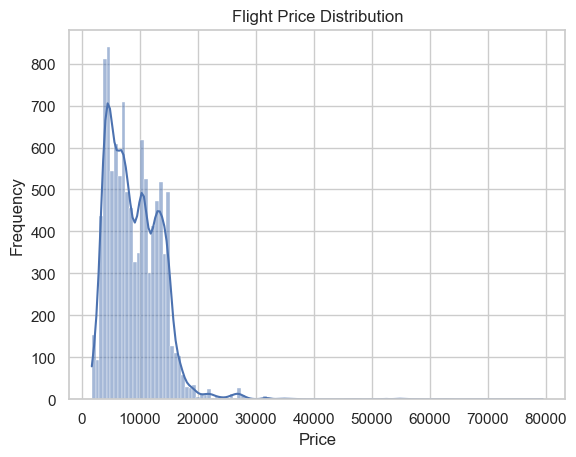

In [34]:
sns.histplot(df['Price'], kde=True).set(title='Flight Price Distribution', xlabel='Price', ylabel='Frequency')

# 3. Range of Prices

In [37]:
# Getting stats of the Price column 
price_stats = df['Price'].describe() 
# Extracting information 
price_range = price_stats['max'] - price_stats['min'] 
min_price = price_stats['min'] 
max_price = price_stats['max'] 
print(f"Minimum Price: {min_price}") 
print(f"Maximum Price: {max_price}") 
print(f"Price Range: {price_range}")

Minimum Price: 1759.0
Maximum Price: 79512.0
Price Range: 77753.0


# 4. Variation of flight prices by airline

[Text(0.5, 1.0, 'Flight Prices by Airline'),
 Text(0.5, 0, 'Airline'),
 Text(0, 0.5, 'Price')]

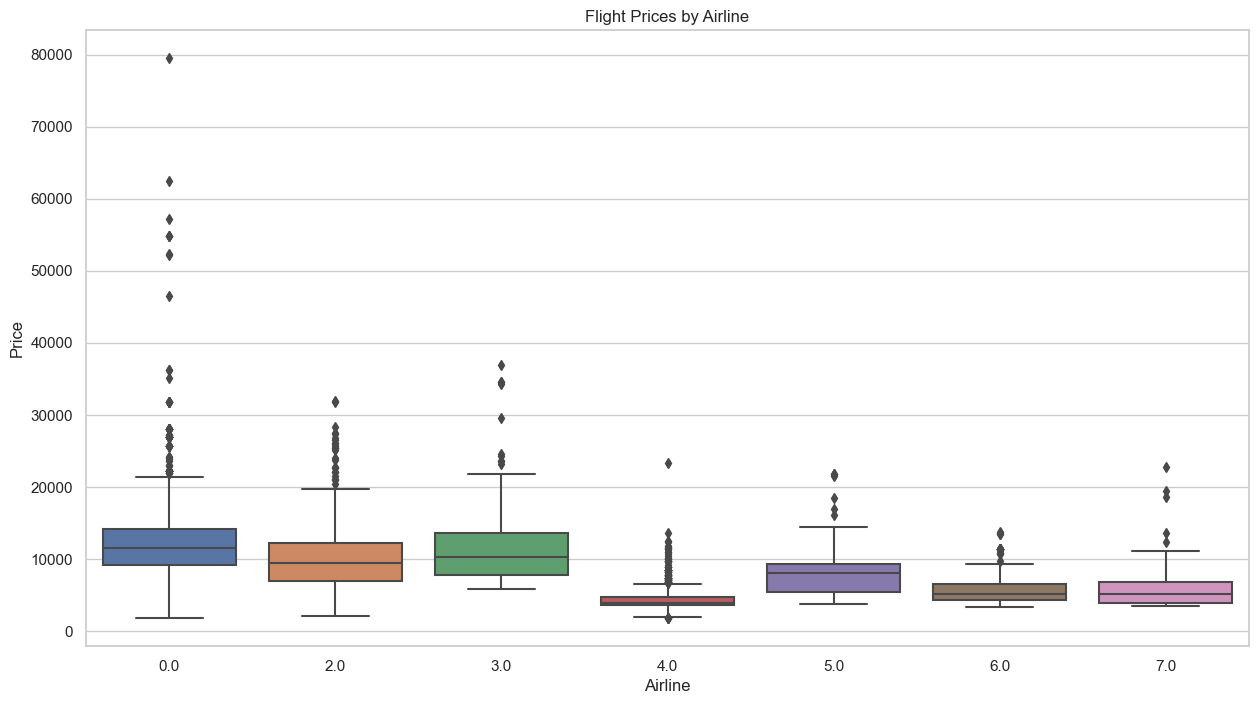

In [38]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Airline', y='Price', data=df).set(title='Flight Prices by Airline', xlabel='Airline', ylabel='Price')


 From the graph we can see comparison between price and airline

In [41]:
# Histogram between prices and airlines

<Axes: xlabel='Airline', ylabel='Price'>

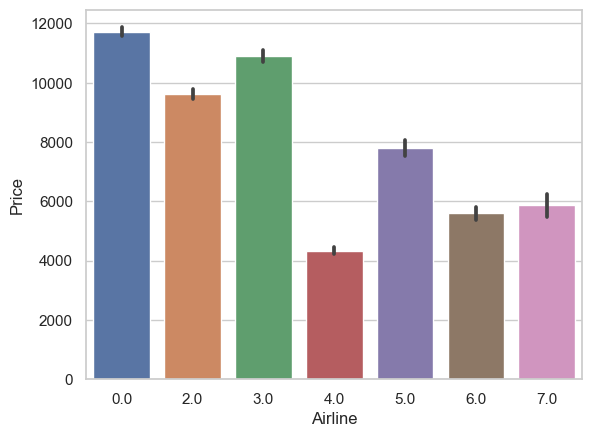

In [27]:
sns.set(style="whitegrid"); sns.barplot(x='Airline', y='Price', data=df)

# 5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

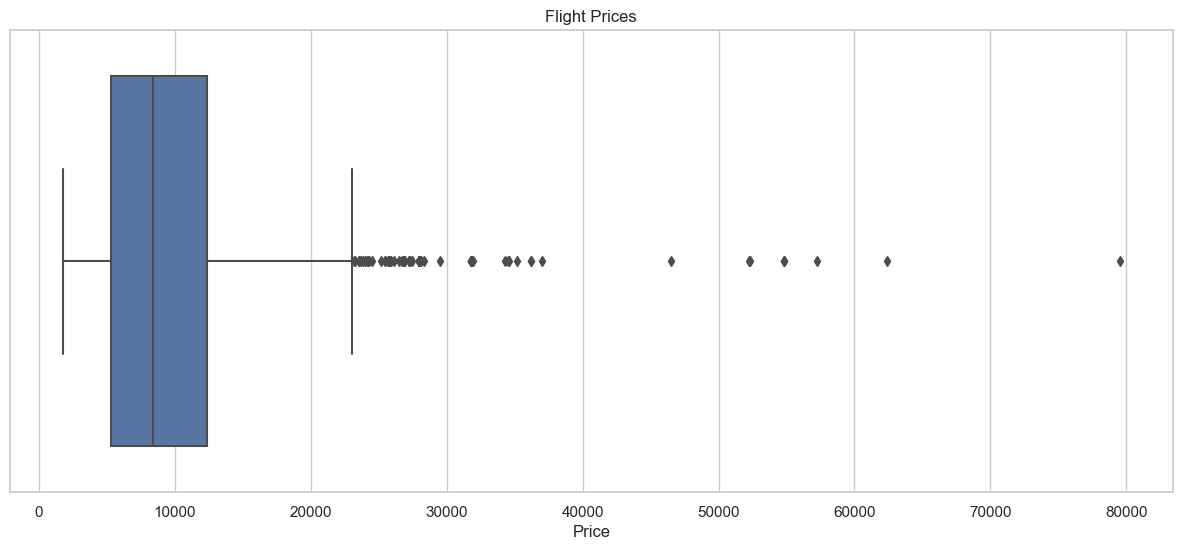

In [45]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Price', data=df)
plt.title('Flight Prices')
plt.xlabel('Price')
plt.show()

Ans:We can observe some outlierrs of flight prices by airline when we look in the boxplot given above. We note that there are some values greater than Q3 + (1.5 * IQR) or less than Q1 - (1.5 * IQR).

Here if we take the average price then the data above 20000 as per seen in the above box plot might affect the overall price

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

Ans: To analyze the peak travel season, we need to look at the folowing details

i) Month and Seasonility

ii) Date of Journey

iii) Average price

To display a visualization we can use histogram with average flight price with date.

# Q7.You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

Ans: To analyze trends in a flight prizes we can compare between 
1) Date of Journey: Analyzing how flight prices change over time can reveal seasonal trends, peak travel periods, and fluctuations in demand.

2) Airline: Comparing prices across different airlines can uncover pricing strategies, market competitiveness, and customer preferences.

3) Departure and Arrival Locations: Investigating price variations based on departure and arrival cities or airports can highlight regional demand and supply dynamics.

For visualization:

Scatter Plots: Analyzing the relationship between flight duration and price to identify any correlations or clusters based on travel preferences.

Time Series Plots: Line plots showing flight prices over time (year,month or day) to visualize seasonal trends and fluctuations.

Ans: The features to be analyzed would include aspects such as flight duration, flight delays, destination of trips, airlines, flight dates, among others, and the relationship these characteristics have with flight prices.

Finally, to present the visualizations of the findings, I would use informative visualizations such as scatter plots, bar charts, and heatmaps.